### Reunião para analises de dados sobre cancelamento de clientes.

   Ainda assim, existem dúvidas a respeito de como a estrutura atual da organização oferece uma interessante oportunidade para verificação dos índices pretendidos. Acima de tudo, é fundamental ressaltar que a complexidade dos estudos efetuados faz parte de um processo de gerenciamento das diretrizes de desenvolvimento para o futuro. Assim mesmo, o julgamento imparcial das eventualidades desafia a capacidade de equalização das direções preferenciais no sentido do progresso. Neste sentido, a valorização de fatores subjetivos talvez venha a ressaltar a relatividade de todos os recursos funcionais envolvidos.

          É claro que a adoção de políticas descentralizadoras apresenta tendências no sentido de aprovar a manutenção do orçamento setorial.
   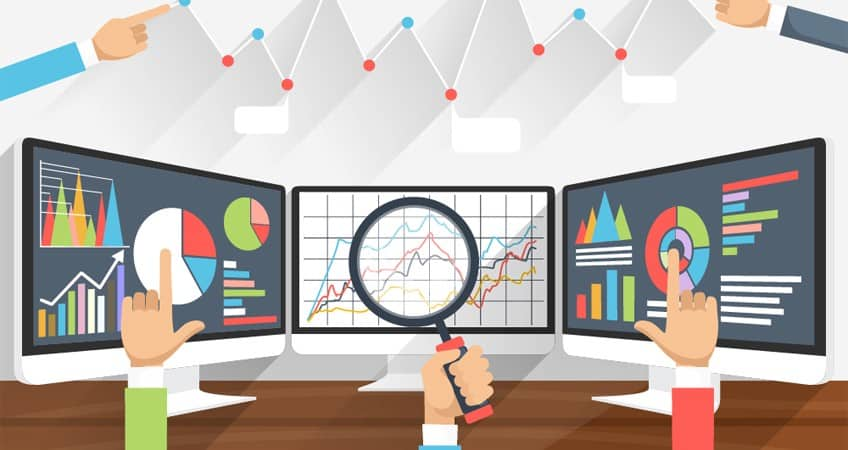



## Trazendo os dados do _dataset_ para o __notebook:__

In [ ]:
import pandas as pd
# lê os dados da tabela
tabela = pd.read_csv('cancelamentos.csv')
# mostra os dados da tabela na tela
display(tabela)

## Agora vou eliminar da consulta dados desnecessarios. Vou eliminar o id do uduario.

In [ ]:
tabela = tabela.drop('CustomerID', axis=1)
display(tabela)

## Vamos descobrir quantas linhas com informações vazias nós temos.

In [ ]:
display(tabela.info())

## Vamos eliminar as células vazias da nossa consulta.

In [ ]:
tabela = tabela.dropna()
display(tabela.info())

## Vamos contar quantos usuarios __cancelaram__, e quantos __não__ __cancelaram__

In [ ]:
display(tabela['cancelou'].value_counts())

## Traduzindo para porcentagem:

In [ ]:
display(tabela['cancelou'].value_counts(normalize=True).map('{:.2%}'.format))

Próxima análise de dados vai ser para verificar a duração dos contratos.

In [ ]:
display(tabela['duracao_contrato'].value_counts())
display(tabela['duracao_contrato'].value_counts(normalize=True).map('{:.2%}'.format))

## Vamos agrupar as informações da duração do contrato: 

In [ ]:
display(tabela.groupby('duracao_contrato').mean(numeric_only=True))

## Vamos elimina os dados dos contratos mesais.

In [ ]:
tabela = tabela[tabela['duracao_contrato'] != 'Monthly']
display(tabela)
display(tabela['cancelou'].value_counts())
display(tabela['cancelou'].value_counts(normalize=True).map('{:2%}'.format))

Vamos dar uma olhada nos tipos de assinaturas

In [ ]:
display(tabela['assinatura'].value_counts(normalize=True).map('{:2%}'.format))
display(tabela.groupby('assinatura').mean(numeric_only=True))

Vamos passar a analisar as assinaturas olhando os gráficos de cada coluna.

In [ ]:
import plotly.express as px
for coluna in tabela.columns:
    grafico = px.histogram(tabela, x=coluna, color='cancelou', width=600)
    grafico.show()

Achamos as anomalias: Ligações para call center e dias de atraso. Os clientes com mais de 20 dias de atraso cancelaram as assinaturas, enquanto que os clientes que fizeram mais de 5 ligações para o call center, todos cancelaram a assinatura.

In [40]:
tabela = tabela[tabela['ligacoes_callcenter'] <5 ]
tabela = tabela[tabela['dias_atraso'] <=20]
display(tabela)
display(tabela['cancelou'].value_counts())
display(tabela['cancelou'].value_counts(normalize=True).map('{:.2%}'.format))

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
6,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.00,24.0,1.0
7,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.00,30.0,1.0
9,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.00,29.0,1.0
13,48.0,Female,35.0,25.0,1.0,13.0,Basic,Annual,518.00,17.0,1.0
19,42.0,Male,15.0,16.0,2.0,14.0,Premium,Quarterly,262.00,16.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
881661,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
881662,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
881663,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
881664,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


cancelou
0.0    379032
1.0     85447
Name: count, dtype: int64

cancelou
0.0    81.60%
1.0    18.40%
Name: proportion, dtype: object